In [91]:
import pandas as pd
import numpy as np
import random as r
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.stats import skewnorm

In [25]:
cf = pd.read_csv('cultural_facilities.csv')
fss = pd.read_csv('festival_specifics.csv')
fs = pd.read_csv('festivals.csv')
ls = pd.read_csv('leisure_sports.csv')
rs = pd.read_csv('restaurants.csv')
ts = pd.read_csv('tourist_spots.csv')

In [10]:
cf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5244 entries, 0 to 5243
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   addr1          5240 non-null   object 
 1   addr2          3218 non-null   object 
 2   areacode       5244 non-null   int64  
 3   booktour       3872 non-null   float64
 4   cat1           5244 non-null   object 
 5   cat2           5244 non-null   object 
 6   cat3           5244 non-null   object 
 7   contentid      5244 non-null   int64  
 8   contenttypeid  5244 non-null   int64  
 9   createdtime    5244 non-null   int64  
 10  firstimage     4030 non-null   object 
 11  firstimage2    4030 non-null   object 
 12  cpyrhtDivCd    4030 non-null   object 
 13  mapx           5244 non-null   float64
 14  mapy           5244 non-null   float64
 15  mlevel         5243 non-null   float64
 16  modifiedtime   5244 non-null   int64  
 17  sigungucode    5244 non-null   int64  
 18  tel     

In [11]:
rs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2795 entries, 0 to 2794
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  2795 non-null   object 
 1   station    2795 non-null   object 
 2   district   2795 non-null   object 
 3   name       2795 non-null   object 
 4   score      2795 non-null   object 
 5   category   2795 non-null   object 
 6   hashtag    2679 non-null   object 
 7   image      2342 non-null   object 
 8   loc_x      2795 non-null   float64
 9   loc_y      2795 non-null   float64
dtypes: float64(2), object(8)
memory usage: 131.1+ KB


# 랜덤 함수들

참고링크<br>
https://docs.python.org/ko/3/library/random.html

In [73]:
r.randint(0,10)

9

In [74]:
round(r.uniform(0,10),1)

2.0

In [75]:
r.sample([1,2,3], 2)

[3, 2]

In [76]:
r.choice([1,2,3])

3

# 리뷰 데이터셋 생성

참고링크<br>
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html

In [64]:
all_tour_id = pd.concat([cf, fs, ls, ts])['contentid'].unique().tolist()

In [28]:
# 하루에 n개의 랜덤리뷰 -> TouristSpotID: 기존 데이터 contentid 중 랜덤, Score: 조정한 랜덤(25=기본), Timestamp: 리뷰생성일, UserID: 랜덤 (00000000)
random.choice(all_tourist_spot_id)

2767886

In [207]:
# df = pd.DataFrame(data, index, columns, dtype, copy)
# 빈 df 생성
review = pd.DataFrame(columns=['UserID', 'TouristSpotID', 'Timestamp', 'Score'])

In [208]:
review

,UserID,TouristSpotID,Timestamp,Score


In [77]:
today_num_of_review = r.randint(300, 500)

In [46]:
datetime.now().strftime('%Y%m%d%H%M%S')

'20240731155405'

In [78]:
now = datetime.now()
year = now.year
month = now.month
day = now.day
hour = r.randint(0, 24)
minute = r.randint(0, 60)
second = r.randint(0, 60)

In [79]:
year, month, day, hour, minute, second

(2024, 7, 31, 16, 36, 51)

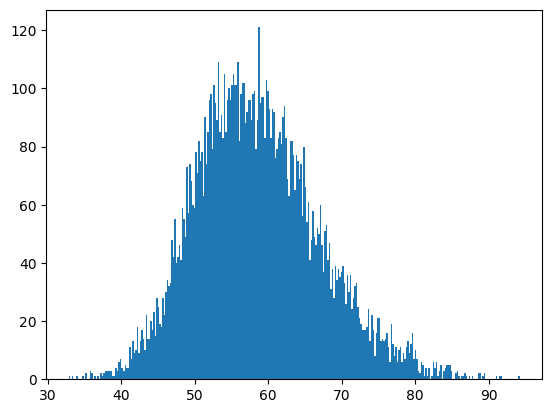

In [174]:
a, loc, scale = 2, 50, 12
data = skewnorm(a, loc, scale).rvs(size=10000)
plt.hist(data, bins=300)
plt.show()

In [201]:
test = skewnorm(a, loc, scale).rvs(1)[0]
test

49.73016770017394

In [215]:
# 랜덤 리뷰 생성 test
# UserID
userid = r.randint(0,100000000)

# TouristSpotID
tourid = r.choice(all_tour_id)

# Timestamp
now = datetime.now()
year = now.year
month = now.month
day = now.day
hour = r.randint(0, 23)
minute = r.randint(0, 59)
second = r.randint(0, 59)
timestamp = datetime(year, month, day, hour, minute, second)

# Score
score = int(skewnorm(a, loc, scale).rvs(1)[0])
if score > 100:
    score = 100
elif score < 0:
    score = 0

print(f"""
UserID: {userid}
TouristSpotID: {tourid}
Timestamp: {timestamp}
Score: {score}
""")


UserID: 97503432
TouristSpotID: 2462827
Timestamp: 2024-07-31 07:47:07
Score: 65



In [242]:
# 랜덤 리뷰 추가 test
df = pd.DataFrame(columns=['UserID', 'TouristSpotID', 'Timestamp', 'Score'])
created_data = pd.DataFrame({
    'UserID': [userid],
    'TouristSpotID': [tourid],
    'Timestamp': [timestamp],
    'Score': [score]
})
create_data
df = pd.concat([df, created_data])
df

,UserID,TouristSpotID,Timestamp,Score
0,54416781,2750916,2024-07-31 05:47:44,50.330531


In [286]:
# 최종 랜덤 리뷰 생성
today_num_of_review = r.randint(500, 800)

review_df = pd.DataFrame(columns=['UserID', 'TouristSpotID', 'Timestamp', 'Score'])
for i in range(today_num_of_review):
    # UserID
    userid = r.randint(0,100000000)
    
    # TouristSpotID
    all_tour_id = pd.concat([cf, fs, ls, ts])['contentid'].unique().tolist()
    tourid = r.choice(all_tour_id)
    
    # Timestamp
    now = datetime.now()
    year = now.year
    month = now.month
    day = now.day
    hour = r.randint(0, 23)
    minute = r.randint(0, 59)
    second = r.randint(0, 59)
    timestamp = datetime(year, month, day, hour, minute, second)
    
    # Score
    score = int(skewnorm(a, loc, scale).rvs(1)[0])
    if score > 100:
        score = 100
    elif score < 0:
        score = 0

    # dataframe
    review = pd.DataFrame({
        'UserID': [userid],
        'TouristSpotID': [tourid],
        'Timestamp': [timestamp],
        'Score': [score]
    })
    review_df = pd.concat([ review_df, review ])
    
review_df = review_df.sort_values(by=['Timestamp'], axis=0).reset_index(drop=True)

In [287]:
review_df

,UserID,TouristSpotID,Timestamp,Score
0,75738663,645791,2024-07-31 00:03:41,62
1,2385835,130828,2024-07-31 00:05:15,64
2,74716563,944855,2024-07-31 00:08:26,57
3,3287229,753768,2024-07-31 00:11:31,45
4,68961307,976598,2024-07-31 00:11:42,54
...,...,...,...,...
734,67049736,3116497,2024-07-31 23:47:28,44
735,84317943,2774286,2024-07-31 23:50:58,58
736,60920113,2773265,2024-07-31 23:53:02,61
737,39436608,126527,2024-07-31 23:54:48,67
